<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/fotobox-cvml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
#from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#convert to script:
#jupyter nbconvert --to script *.ipynb

# Face Frontal Classifier

In [ ]:
#face_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


(2592, 3888, 3)
(864, 1296, 3)


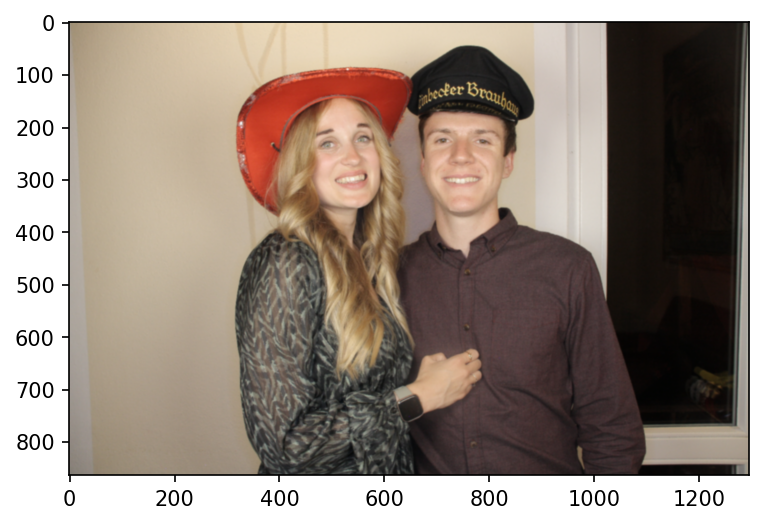

In [ ]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
#org_img = cv2.imread('/content/drive/MyDrive/test.JPG')
#org_img = cv2.imread('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg')
#org_img = cv2.imread('test_gruppe.jpg')
org_img = cv2.imread('test_gesicht3.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 3
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(6, 4), dpi=150)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [ ]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.15, minNeighbors=20, outputRejectLevels=True)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=15, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[441 158 184 184]
 [658 160 187 187]
 [327 700  52  52]
 [684 329 100 100]
 [559 803  54  54]]
[25 25 25 25 25]
[9.80280505 7.14186205 3.53572996 1.36891517 3.88885107]


True

<Figure size 432x288 with 0 Axes>

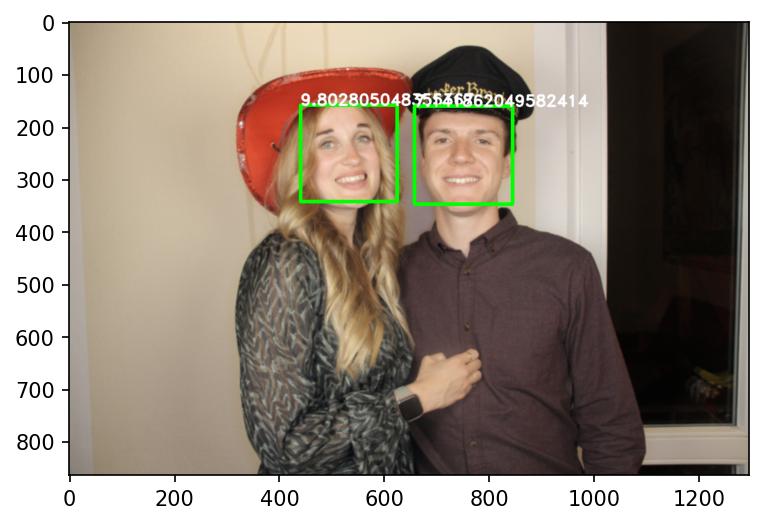

In [ ]:
score_val = 5
i = 0
plt.clf()
faces = 0
for (x, y, w, h) in face_boxes:
  if (levelWeights[i]>score_val):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
    #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    faces = faces + 1
  i = i + 1
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
cv2.imwrite("face_detected.jpg", img)


#plt.savefig('test_detected.jpg')
#cv2.imshow('Output', img)
#cap.release()
#cv2.destroyAllWindows()

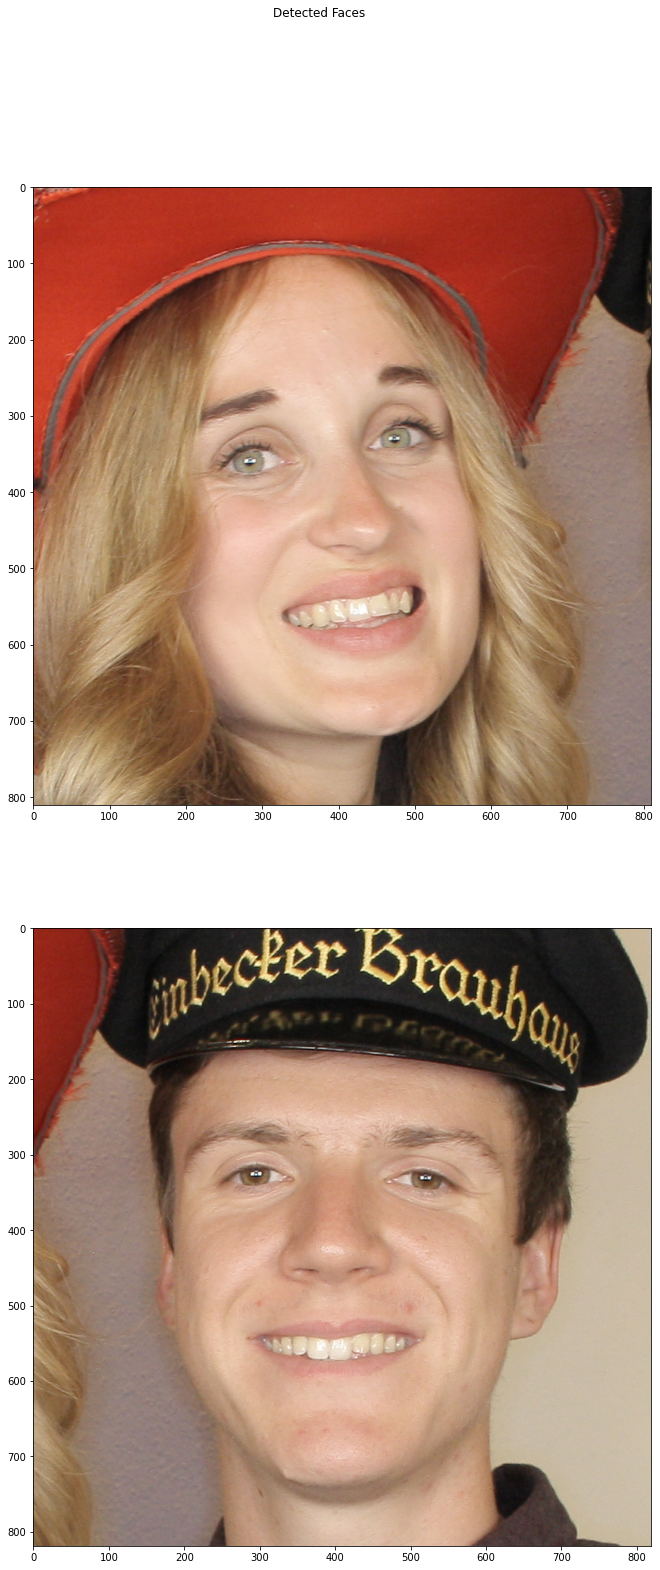

In [ ]:
i = 0
#plt.figure(figsize=(4, 8), dpi=150)
fig,axs = plt.subplots(faces,figsize=(25,25))
axs_index = 0
fig.suptitle('Detected Faces')
for face_box in face_boxes:
  if (levelWeights[i]>score_val):
    x, y, w_box, h_box = face_box*reduce_factor
    #h_org of original image
    #w_org of original image
    #print(x, y, w_box, h_box)
    crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
    x = x - crop_padding
    y = y - crop_padding
    if x <= 0:
      x = 0
    if y <= 0:
      y = 0

    #create size of face box with padding
    w_box = w_box + 2*crop_padding
    h_box = h_box + 2*crop_padding

    #if face is near edge --> cropped image is moved from edge away
    if (x + w_box) >= w_org:
      x = w_org - w_box
    if (y + h_box) >= h_org:
      y = h_org - h_box

    #print(x, y, w_box, h_box)
    cropped_img = org_img[y:y+h_box, x:x+w_box]

    #plt.imshow(cropped_img)
    cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
    axs[axs_index].imshow(cropped_img)
    filename = "face%s.jpg"%axs_index
    cv2.imwrite(filename, cropped_img)
    axs_index = axs_index+1
  i = i+1


**Smile Classifier**

In [ ]:
#smile_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_smile.xml')
smile_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [ ]:
img = cv2.imread('face0.jpg')

In [ ]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
smile_boxes,rejectLevels, levelWeights = smile_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=40, outputRejectLevels=True)
if (len(smile_boxes)<1):
  print("why no smile?")
else:
    print(np.argmax(levelWeights))
    print(smile_boxes)
    print(rejectLevels)
    print(levelWeights)


8
[[ 52 564  72  36]
 [116 617  47  24]
 [369 441 103  52]
 [691 604  82  41]
 [309  55  95  47]
 [611 409  75  37]
 [295 220 129  65]
 [351 288  74  37]
 [297 517 252 126]
 [ 55 237 210 105]
 [172 486 177  88]
 [214 356 121  60]
 [693 743  91  46]
 [287 713 124  62]
 [428 316 112  56]
 [683 532  66  33]
 [581 358  76  38]
 [487 372 107  53]]
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
[ 3.10686631  2.58480827  2.37202734  0.78671545  2.30246222  1.81336402
  1.12613351  1.55130803  5.16170594  1.3807219   1.61287324  2.34799946
  0.82762243  1.55407724  1.80428768  2.41659638  1.33428334 -0.06249687]


In [ ]:
#for (x, y, w, h) in smile_boxes:
  #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    
(x, y, w, h) = smile_boxes[np.argmax(levelWeights)]
_ = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

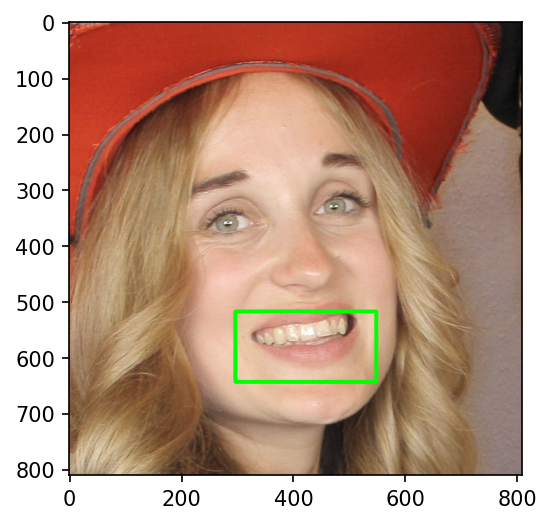

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

# Gesture Detection

In [1]:
#code from: https://techvidvan.com/tutorials/hand-gesture-recognition-tensorflow-opencv/

#pip install opencv-python
#pip install mediapipe
#pip install tensorflow
#https://techvidvan.s3.amazonaws.com/machine-learning-projects/hand-gesture-recognition-code.zip

# import necessary packages for hand gesture recognition project using Python OpenCV
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

In [63]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.8)
mpDraw = mp.solutions.drawing_utils

In [64]:
# Load the gesture recognizer model

model = load_model('hand-gesture-recognition-code\mp_hand_gesture')
#model = load_model('mp_hand_gesture')
# Load class name
f = open('hand-gesture-recognition-code\gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


(482, 686, 3)
(80, 114, 3)


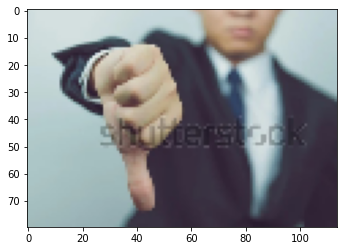

In [120]:
#thumbs_img = cv2.imread('thumbsup.jpg')
#thumbs_img = cv2.imread('thumbsup2.jpg')
thumbs_img = cv2.imread('thumbsdown.jpg')
#thumbs_img = cv2.imread('face0.jpg')


h_org,w_org,temp = thumbs_img.shape
print(thumbs_img.shape)
reduce_factor = 6
thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
#thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
plt.clf()
plt.imshow(framergb)
x , y, c = framergb.shape
print(framergb.shape)

In [121]:
def calc_landmark_center(landmarks):
    ###for simplicity get average of landmarks and use this as center for a hand
    x = 0
    y = 0
    samples = len(landmarks)
    for lm in landmarks:
        x = x + lm[0]
        y = y + lm[1]
    x = int(x/samples)
    y = int(y/samples)
    return x,y

def get_thumb_orientation(landmarks,show_debug):
    ###return the orientation of the hand: true = thumbsup; false = thumbsdown
    max_y = 0
    min_y = 1000000
    samples = len(landmarks)
    for lm in landmarks:
        if lm[1] > max_y:
            max_y = lm[1]
        if lm[1] <= min_y:
            min_y = lm[1]
    
    #lm[4] #thumb landmark

    dist_top = max_y - landmarks[4][1]
    
    dist_bottom = min_y - landmarks[4][1]
    
    if dist_bottom == 0.0:
        orientation = True #thumbsup
        if show_debug:
            print("thumbsup")
    elif dist_top == 0.0:
        orientation = False #thumbsdown
        if show_debug:
            print("thumbsdown")
    
    if ((dist_bottom != 0.0) and (dist_top != 0.0)):
        valid = False
    else:
        valid = True
    
    
    
    if show_debug:
        print("hand landmark.y from %s to %s"%(min_y,max_y))
        print("thumb landmark: %s"%landmarks[4][1])
        print("distance top: %s"%dist_top)
        print("distance bottom: %s"%dist_bottom)
    #print(max_y,min_y)
    
    return orientation,valid

## process frame to detect hand landmarks 

In [122]:
# Get hand landmark prediction

#process twice due to better results
counter = 0
while counter < 2:
    result = hands.process(framergb)
    className = ''
    # post process the result
    if result.multi_hand_landmarks:
        print("found hand landmarks")
        landmarks_pred = []
        landmarks_draw = []
        shape = thumbs_img.shape
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)
                landmarks_pred.append([lmx, lmy])
                landmarks_draw.append([lm.x * shape[1],lm.y * shape[0]])
                cv2.circle(thumbs_img,(int((lmx/x)*y), int((lmy/y)*x)),15,(255, 0, 0))              
            mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)
    else:
        print("no hand landmarks")
    counter = counter + 1
# Drawing landmarks on frames
#rx,ry = calc_landmark_center(landmarks_draw)
#thumb_up_down = get_thumb_orientation(landmarks_draw,False)
#print(rx,ry)
#_ = cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))

found hand landmarks
found hand landmarks


## calculate prediction based on landmarks with 1) model.predict and 2) distance

1/1 [==============================] - 0s 32ms/step
model prediction: thumbs down
landmark calculation: thumb_down


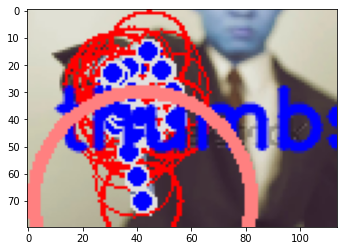

In [124]:
# Predict gesture in Hand Gesture Recognition project
if result.multi_hand_landmarks:
    for i in range(len(landmarks_pred)//21):
        #predict hand class with model
        prediction = model.predict([landmarks_pred[i*21:(21+(i*21))]]) #problem with predict if more than one hand is detected
        #prediction = model.predict([landmarks_pred[0:21]])
        #--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten
        pred = prediction.flatten()
        classID = np.argmax(pred[0:len(pred)-1]) #ignore smile

        className = classNames[classID]
        print("model prediction: %s"%className)
        cv2.putText(thumbs_img, className, (10, (50+i*50)), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)


        #seperate thumb up from thumb down based on max y position
        thumb_up_down,valid_thumb_orientation = get_thumb_orientation(landmarks_draw[i*21:(21+(i*21))],False)
        if valid_thumb_orientation:
            if thumb_up_down:
                print("landmark calculation: thumb_up")
            else:
                print("landmark calculation: thumb_down")
            thumb_offset = 4
            cv2.circle(thumbs_img,(int(landmarks_draw[(i*21)+thumb_offset][0]),int(landmarks_draw[(i*21)+thumb_offset][1])),40,(255,128,128),4)


        #get average hand position for future usage
        rx,ry = calc_landmark_center(landmarks_draw[i*21:(21+(i*21))]) 
        cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))

    plt.imshow(thumbs_img)
    cv2.imwrite("thumbs.jpg", thumbs_img)
else:
    print("no hand landmarks in img")

https://answers.opencv.org/question/24154/how-to-using-opencv-api-get-web-video-stream/

In [ ]:
#VideoCapture cap;
#cap.open(192.168.1.180/?action=stream?dummy=param.mjpg);